In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_error, confusion_matrix, log_loss, mean_squared_error, classification_report, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

In [ ]:
df = pd.read_csv("/home/jovyan/work/loan_prediction.csv", sep =',' )
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Visualization of the data

In [ ]:
df.head(615)
# Dependents = personne à charge. Credit_History = as-t'il déja fait un pret ?.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## See the proportions

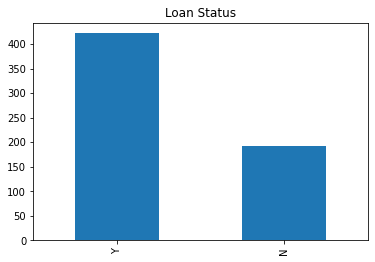

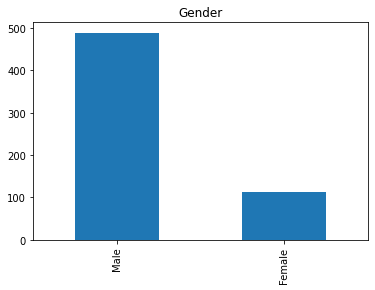

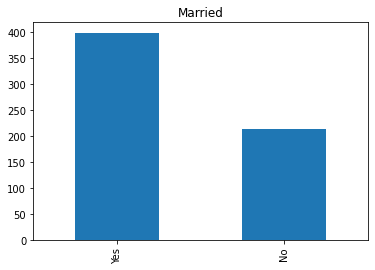

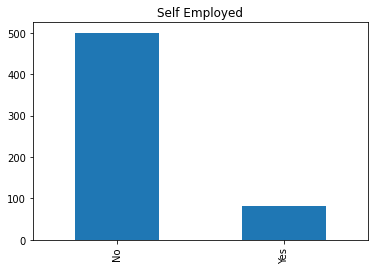

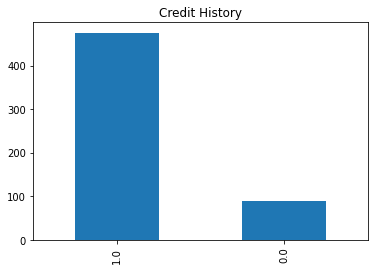

In [ ]:
df.Loan_Status.value_counts().plot.bar()
plt.title('Loan Status')
plt.show()
df.Gender.value_counts().plot.bar()
plt.title('Gender')
plt.show()
df.Married.value_counts().plot.bar()
plt.title('Married')
plt.show()
df.Self_Employed.value_counts().plot.bar()
plt.title('Self Employed')
plt.show()
df.Credit_History.value_counts().plot.bar()
plt.title('Credit History')
plt.show()

In [ ]:
df.shape

(614, 13)

## Checking missing values

In [ ]:
df.isna().any().any()

True

## List the columns where we have missing values and how many

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isna().sum().sum()

149

## Feature Engineering

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.drop(['Loan_ID'],axis = 'columns',inplace=True) #we do not take in count the customers ID because it's not related to our searching
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome'] #We coulb merge and sum the colum ApplicantIncome and Coapplicantincome
#as the total income
df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome'], axis = 1)
#df['Monthly_cost'] = df['LoanAmount']/df['Loan_Amount_Term']
#df['Income_after_paid'] = df['Income']-df['Monthly_cost'] 




,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [ ]:
df = pd.get_dummies(df, columns = ['Property_Area'])

## We will fill the NA value with the mode of their columns, which is the most represented value 

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True) #The data contains high outliers, we will use the median rather the mean

## We categorize our columns

In [ ]:
df.loc[df.Gender=='Male','Gender']= 1
df.loc[df.Gender=='Female','Gender']= 0

df.loc[df.Married=='No','Married']= 0
df.loc[df.Married=='Yes','Married']= 1

df.loc[df.Education=='Not Graduate','Education']= 0
df.loc[df.Education=='Graduate','Education']= 1

df.loc[df.Loan_Status == 'Y', 'Loan_Status'] = 1
df.loc[df.Loan_Status == 'N', 'Loan_Status'] = 0

df.loc[df.Self_Employed == 'Yes', 'Self_Employed'] = 1
df.loc[df.Self_Employed == 'No', 'Self_Employed'] = 0

df.loc[df.Dependents == '3+', 'Dependents'] = 3 #to convert the values of this column from string to categories we just tranform the 3+ into 3 

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,5849.0,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,3000.0,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,6000.0,0,0,1


## Checking if we still have missing values

In [ ]:
df.isna().sum() #We suceeded to complete the missing the value 

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Total_Income               0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Income',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## Scaling the features

In [ ]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income']].to_numpy()

y = df['Loan_Status'].to_numpy()

scaler = MinMaxScaler(feature_range= (0,1)) #Score of 0.809, r2 = 0.113
#scaler = StandardScaler() #Score of 0.807, r2 = 0.105

X_scaled = scaler.fit_transform(X)

## We will not split our dataset because it has low records (around 600) which is not enough to feed our different part.
##### The train-test procedure is not appropriate when the dataset available is small. The reason is that when the dataset is split into train and test sets, there will not be enough data in the training dataset for the model to learn an effective mapping of inputs to outputs. There will also not be enough data in the test set to effectively evaluate the model performance. The estimated performance could be overly optimistic (good) or overly pessimistic (bad).


## Scikit learn method

In [ ]:
y = y.astype('int') # Convert our types(df.Loand_Status) = 0 in integer

In [ ]:
model = LogisticRegression()

model.fit(X_scaled, y)

score = model.score(X_scaled, y)

y_pred = model.predict(X_scaled)

LLoss = log_loss(y, y_pred)
MSE = mean_squared_error(y,y_pred)
RMSE = np.sqrt(mean_squared_error(y, y_pred))
MAE = mean_absolute_error(y, y_pred)
R2 = r2_score(y, y_pred)
print(' Log loss =', LLoss, '\n', 'MSE =', MSE, '\n', 'RMSE =', RMSE, '\n', 'MAE =', MAE)
print('coefficients : ', model.coef_)

 Log loss = 6.581636472185459 
 MSE = 0.19055374592833876 
 RMSE = 0.43652462236205963 
 MAE = 0.19055374592833876
coefficients :  [[-0.00903013  0.50085499  0.07205676  0.3421879  -0.01446686 -0.63857405
  -0.25433663  3.37509997 -0.33067856  0.4832967  -0.15295644 -0.30789685]]


coefficients :  [[-0.00903013  0.50085499  0.07205676  0.3421879  -0.01446686 -0.63857405
  -0.25433663  3.37509997 -0.33067856  0.4832967  -0.15295644 -0.30789685]]
r2 score :  0.11337381516587675 
 Confusion matrix :
 [[ 82 110]
 [  7 415]] 
score : 0.8094462540716613 

report :
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



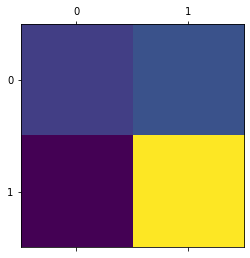

In [ ]:
Confusion = confusion_matrix(y, y_pred)
print('coefficients : ', model.coef_)
plt.matshow(Confusion)
print('r2 score : ', R2,'\n Confusion matrix :\n', Confusion, '\nscore :', score, '\n\nreport :\n', classification_report(y, y_pred))

In [ ]:
print(' Log loss =', LLoss, '\n', 'MSE =', MSE, '\n', 'RMSE =', RMSE, '\n', 'MAE =', MAE)

 Log loss = 6.581636472185459 
 MSE = 0.19055374592833876 
 RMSE = 0.43652462236205963 
 MAE = 0.19055374592833876


## Defining the main functions from scratch

In [ ]:
def Sigmoid(X):
    return 1 / (1+np.exp(-X)) # Hypothesis H(w)

def predictions(X, w):
    z = np.dot(X, w)
    return (Sigmoid(z))
    
def cost_function(w, X, y):
    m = X.shape[0]
    Hyp = Sigmoid(np.dot(X, w)) 
    return -(1/m) * ((np.dot(y.transpose(), np.log(Hyp))) + np.dot((1-y).transpose(),np.log(1 - Hyp)))

def rootMeanSquaredError(actual, predicted):
    error = predicted - actual
    return np.sqrt(np.dot(error.transpose(), error)*(1/len(y)))
  


## Logistic regression with Gradient descent from scratch

In [ ]:
w = np.random.randint(-10, 10, X_scaled.shape[1]) #lenX_scaled[0]

alpha = 0.05  
delta = 0.000001
max_iter = 100000

cost_curr = 10**100
cost_prev = 0
i = 0
costs = []

while(i < max_iter and (cost_prev-cost_curr > delta or cost_prev-cost_curr < 0)): # do it while the last cost cost > previous cost
    gradient = (np.dot(X_scaled.T, predictions(X_scaled, w) - y))/len(X_scaled) # derivative part
    w = w - alpha*gradient #We update our gradient
    cost_prev = cost_curr
    cost_curr = cost_function(w, X_scaled, y) #Computes the cost
    costs.append(cost_curr)

    if i%10 == 0:
        print(i, 'alpha = ', alpha, 'cost =', cost_curr)
    if(cost_curr > cost_prev): #Decreasing alpha if the cost function augment
        alpha = alpha/1.4 
    i += 1




0 alpha =  0.05 cost = 2.7913085652868443
10 alpha =  0.05 cost = 2.7564094256897684
20 alpha =  0.05 cost = 2.72552081605971
30 alpha =  0.05 cost = 2.6979764569089735
40 alpha =  0.05 cost = 2.673212350114189
50 alpha =  0.05 cost = 2.6507565653363185
60 alpha =  0.05 cost = 2.6302171355595725
70 alpha =  0.05 cost = 2.611269805181594
80 alpha =  0.05 cost = 2.593646752743306
90 alpha =  0.05 cost = 2.5771267489636647
100 alpha =  0.05 cost = 2.561526869911111
110 alpha =  0.05 cost = 2.5466956451012943
120 alpha =  0.05 cost = 2.532507453853425
130 alpha =  0.05 cost = 2.518857960775583
140 alpha =  0.05 cost = 2.505660391916112
150 alpha =  0.05 cost = 2.492842504773627
160 alpha =  0.05 cost = 2.4803441089726763
170 alpha =  0.05 cost = 2.4681150330107444
180 alpha =  0.05 cost = 2.456113438371248
190 alpha =  0.05 cost = 2.444304434951946
200 alpha =  0.05 cost = 2.432658937032584
210 alpha =  0.05 cost = 2.4211527018899988
220 alpha =  0.05 cost = 2.409765532825411
230 alpha =  

 Log loss = 6.525381788814496 
 MSE = 0.18892508143322476 
 RMSE = 0.434655129307391 
 MAE = 0.18892508143322476
coefficients :  [[-0.00903013  0.50085499  0.07205676  0.3421879  -0.01446686 -0.63857405
  -0.25433663  3.37509997 -0.33067856  0.4832967  -0.15295644 -0.30789685]]
r2 score :  0.12095181674565558 
 Confusion matrix :
 [[ 82 110]
 [  7 415]] 

report :
               precision    recall  f1-score   support

           0       0.91      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614



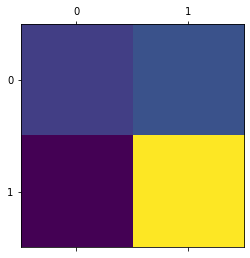

In [ ]:
y_pred = predictions(X_scaled, w) > 0.5
LLoss = log_loss(y, y_pred)
MSE = mean_squared_error(y,y_pred)
RMSE = rootMeanSquaredError(y_pred, y)
MAE = mean_absolute_error(y, y_pred)
R2 = r2_score(y, y_pred)
print(' Log loss =', LLoss, '\n', 'MSE =', MSE, '\n', 'RMSE =', RMSE, '\n', 'MAE =', MAE)
print('coefficients : ', model.coef_)
plt.matshow(Confusion)
print('r2 score : ', R2,'\n Confusion matrix :\n', Confusion, '\n\nreport :\n', classification_report(y, y_pred))

In [ ]:
cost_function(w, X_scaled, y)

0.4672516863168837

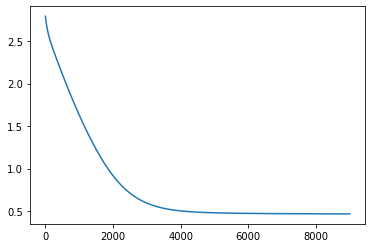

In [ ]:
#plotting the cost history
plt.plot(np.linspace(0, len(costs), len(costs)), costs)

In [ ]:
#confusion matrix from scratch
def matrix_from_scratch(y_pred, y):
    t_positive=0
    t_negative=0
    f_positive=0
    f_negative=0
    for i in range(len(y_pred)):
        if(y_pred[i] == y[i] == 1 ):
            t_positive+=1
        elif(y_pred[i] == y[i] == 0 ):
            t_negative += 1
        elif(y_pred[i] != y[i]):
            if(y_pred[i]==1):
                f_positive += 1
            if(y_pred[i]==0):
                f_negative += 1

    tab= np.zeros((2,2)) 
    tab[1][1] = int( t_positive) 
    tab[0][1] = int(f_positive)
    tab[0][0] = int(t_negative)
    tab[1][0] = int(f_negative) 
    return tab

matrix_from_scratch(y_pred, y) 

array([[ 84., 108.],
       [  8., 414.]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=795a208a-721f-4cdd-b55b-54921c1c335e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>